## Training Materials: Change detction by calculating differences between the two years of ALOS-2/Palsa-2

## Module 1: Introduction to Change Detection

### 1.1 What is Change Detection?

Change detection is the process of identifying differences in the state of an object or phenomenon by observing it at different times. It has various applications, including dam monitoring, disaster management, urban planning, and environmental monitoring.

Common change detection techniques include image differencing, image rationing, change vector analysis, and classification-based methods.

### 1.2 Case study of Riau area, Indonesia

The Riau area, located in Indonesia, serves as our case study. We will use ALOS-2/Palsa-2 data to detect changes in oil palm plantations.

## Module 2: Conversion from DN values to backscatter coefficients

### 2.1 Introduction to DN values and backscatter coefficients

Digital number (DN) values are related to backscatter coefficients through equations that convert DN values to backscatter coefficients.

**Digital Number (DN)** are the raw pixel values in the SAR image, directly representing the amplitude of the radar signal received by the satellite's sensor.

**The backscatter coefficient**, also called normalized radar cross-section, quantifies the radar signal's strength returned to the sensor.

Understanding DN values and their conversion to backscatter coefficients is critical for leveraging ALOS-2 data effectively. DN values are suitable for initial visual interpretation, but Backscatter Coefficient is essential for quantitative analysis and comparisons. Proper calibration and pre-processing steps unlock the full potential of SAR data for real-world applications.

### 2.2 Conversion from DN values to backscatter coefficients


In the previous section, the pixel value（DN; digital number）was used for visualization as is, but for rigorous data analysis, it is desirable to convert the pixel values ​​into backscattering coefficients. The conversion is done using the following formula:

$$ \gamma^{0} = 10 log_{10} <DN^2> + CF $$

Note that, <> represents averaging for noise reduction and -83.0 dB is used for CF. [Global 25m Resolution PALSAR-2/PALSAR Mosaic (Ver. 2.4.0) Dataset Instructions](https://www.eorc.jaxa.jp/ALOS/jp/dataset/pdf/DatasetDescription_PALSAR2_Mosaic_ver240_ja.pdf). A coding example is shown below.

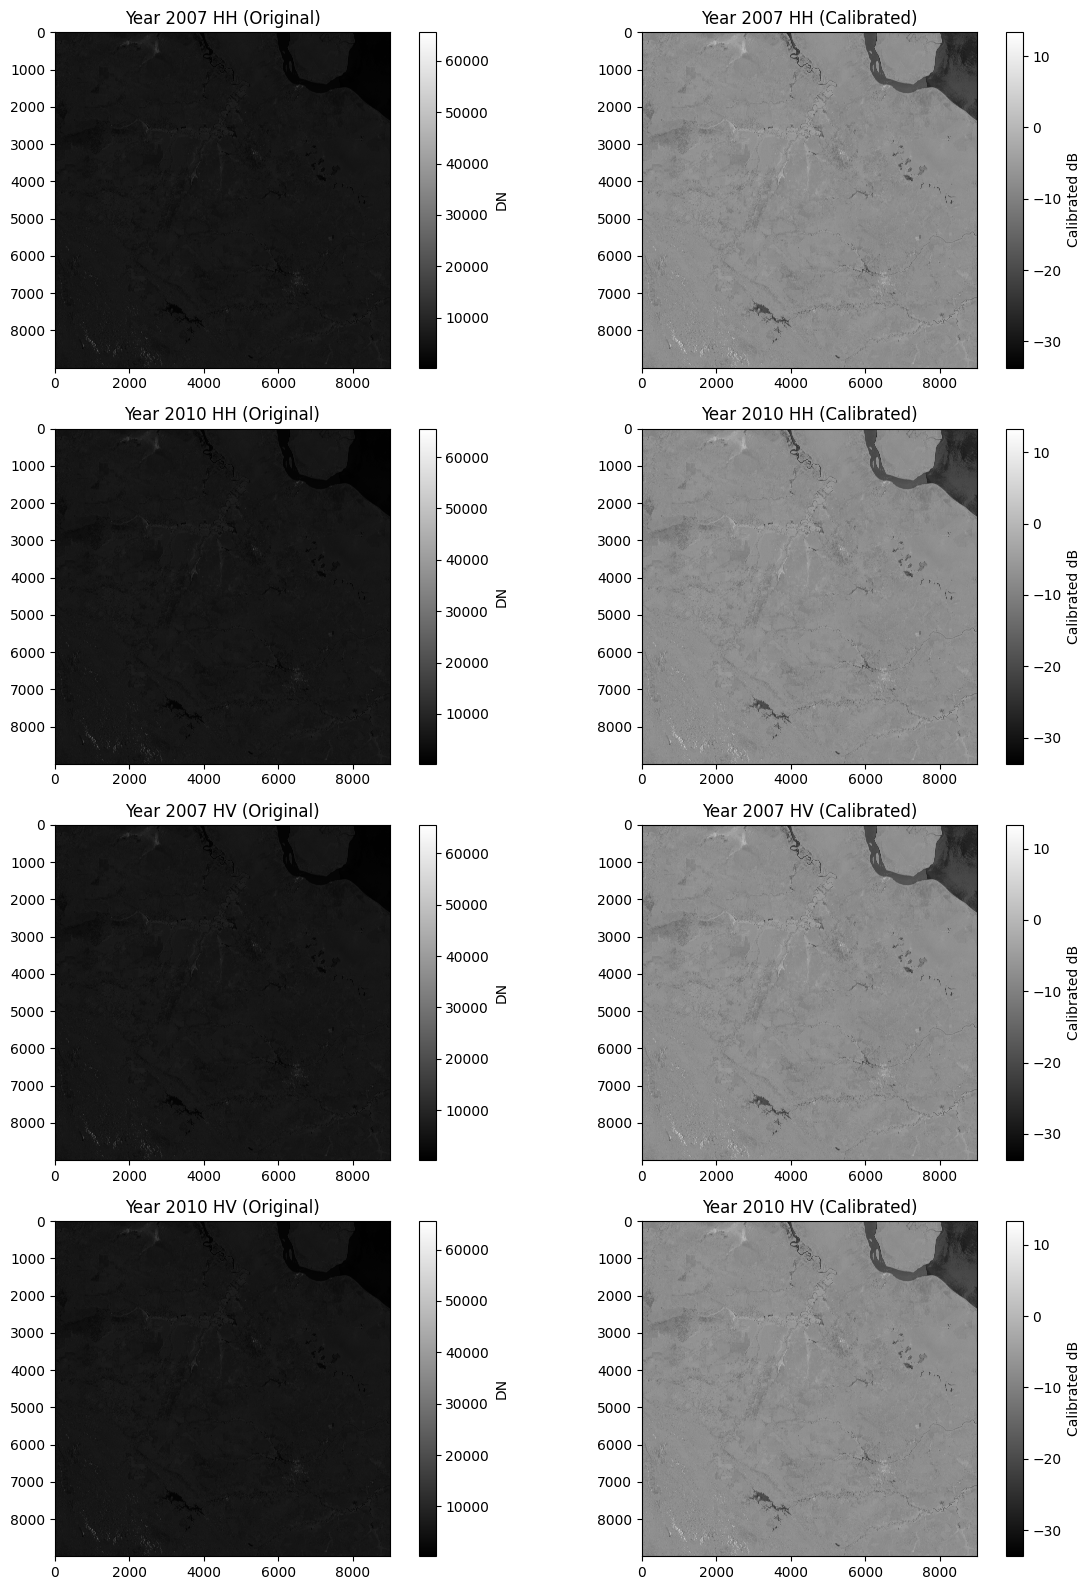

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def calibrate_ima(image):
    return 10 * np.log10(image ** 2) - 83.0

def ima_cal(file_path):
    with rasterio.open(file_path) as src:
        original = src.read(1).astype('float32')
        calibrated = calibrate_ima(original)
    return original, calibrated

hh_2007_path = '/home/jovyan/shared/PCN/ALOS-2/ALOS-2 data/Alos_2_2007_HH.tif'
hh_2010_path = '/home/jovyan/shared/PCN/ALOS-2/ALOS-2 data/Alos_2_2010_HH.tif'
hv_2007_path = '/home/jovyan/shared/PCN/ALOS-2/ALOS-2 data/Alos_2_2007_HV.tif'
hv_2010_path = '/home/jovyan/shared/PCN/ALOS-2/ALOS-2 data/Alos_2_2010_HV.tif'

hh_2007_raw, hh_2007_cal = ima_cal(hh_2007_path)
hh_2010_raw, hh_2010_cal = ima_cal(hh_2010_path)
hv_2007_raw, hv_2007_cal = ima_cal(hv_2007_path)
hv_2010_raw, hv_2010_cal = ima_cal(hv_2010_path)

fig, axs = plt.subplots(4, 2, figsize=(12, 16))

axs[0, 0].imshow(hh_2007_raw, cmap='gray')
axs[0, 0].set_title('Year 2007 HH (Original)')
axs[0, 1].imshow(hh_2007_cal, cmap='gray')
axs[0, 1].set_title('Year 2007 HH (Calibrated)')

axs[1, 0].imshow(hh_2010_raw, cmap='gray')
axs[1, 0].set_title('Year 2010 HH (Original)')
axs[1, 1].imshow(hh_2010_cal, cmap='gray')
axs[1, 1].set_title('Year 2010 HH (Calibrated)')

axs[2, 0].imshow(hv_2007_raw, cmap='gray')
axs[2, 0].set_title('Year 2007 HV (Original)')
axs[2, 1].imshow(hv_2007_cal, cmap='gray')
axs[2, 1].set_title('Year 2007 HV (Calibrated)')

axs[3, 0].imshow(hv_2010_raw, cmap='gray')
axs[3, 0].set_title('Year 2010 HV (Original)')
axs[3, 1].imshow(hv_2010_cal, cmap='gray')
axs[3, 1].set_title('Year 2010 HV (Calibrated)')

for i in range(4):
    fig.colorbar(axs[i, 0].imshow(hh_2007_raw, cmap='gray'), ax=axs[i, 0], orientation='vertical', label='DN')
    fig.colorbar(axs[i, 1].imshow(hh_2007_cal, cmap='gray'), ax=axs[i, 1], orientation='vertical', label='Calibrated dB')

plt.tight_layout()
plt.show()

## Module 3: Change detection by calculating HH and HV change analysis

### 3.1 Introduction to HH/HV change analysis

In this section, By analyzing the HH/HV scattering intensities during the two periods focusing on identifying change using divergence from clustered pixel values.

Change detection by calculating HH and HV change analysis of ALOS-2 refers to identifying and analyzing changes in surface characteristics (e.g., vegetation, water bodies, urban structures) over time by comparing the backscatter intensities of the HH and HV polarizations from ALOS-2/Palsa-2 imagery.


**HH and HV Polarizations**
- HH polarization: Measures horizontally transmitted and horizontally received signals. It is sensitive to surface roughness and structural features, such as buildings or roads.
- HV polarization: Measures horizontally transmitted and vertically received signals. It is sensitive to volume scattering, often caused by vegetation.

### 3.2 HH/HV change analysis

Calculate the difference in image data to analyze the change from 2007 to 2010 for each HH/HV.

In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def calibrate_ima(image):
    return 10 * np.log10(image ** 2) - 83.0

def ima_cal(file_path):
    with rasterio.open(file_path) as src:
        original = src.read(1).astype('float32')
        calibrated = calibrate_ima(original)
    return original, calibrated

hh_2007_path = '/home/jovyan/shared/PCN/ALOS-2/ALOS-2 data/Alos_2_2007_HH.tif'
hh_2010_path = '/home/jovyan/shared/PCN/ALOS-2/ALOS-2 data/Alos_2_2010_HH.tif'
hv_2007_path = '/home/jovyan/shared/PCN/ALOS-2/ALOS-2 data/Alos_2_2007_HV.tif'
hv_2010_path = '/home/jovyan/shared/PCN/ALOS-2/ALOS-2 data/Alos_2_2010_HV.tif'

hh_2007_raw, hh_2007_cal = ima_cal(hh_2007_path)
hh_2010_raw, hh_2010_cal = ima_cal(hh_2010_path)
hv_2007_raw, hv_2007_cal = ima_cal(hv_2007_path)
hv_2010_raw, hv_2010_cal = ima_cal(hv_2010_path)


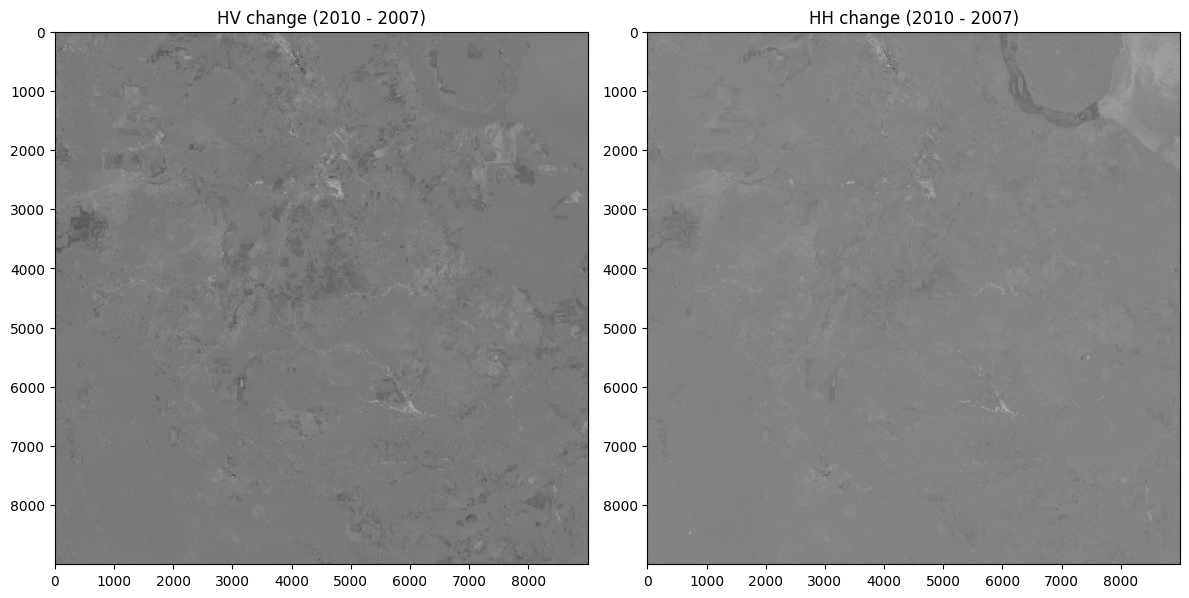

In [2]:
delta_bandhv_cal = hv_2010_cal - hv_2007_cal
delta_bandhh_cal = hh_2010_cal - hh_2007_cal

fig, axs = plt.subplots(1, 2, figsize=(12, 16))

axs[0].imshow(delta_bandhv_cal, cmap='gray')
axs[0].set_title('HV change (2010 - 2007)')
axs[1].imshow(delta_bandhh_cal, cmap='gray')
axs[1].set_title('HH change (2010 - 2007)')
plt.tight_layout()
plt.show()

## Module 4: Change detection by Change Vector Analysis (CVA)

### 4.1 Introduction to Change Vector Analysis (CVA)

CVA represents change as a vector in multispectral space. Each image pixel's spectral values (e.g., red, green, blue, near-infrared) form the vector components.  A change vector connects the pixel's spectral values in a baseline image to its values in a later image.

The change vector has two key components:

* **Magnitude:** Represents the intensity of change, calculated as the length of the change vector.
* **Direction:** Represents the type of change, determined by the angle of the change vector in multispectral space.

### 4.2 Change vector analysis (CVA) Data analysis

By analyzing the magnitude and direction of change vectors, CVA offers a comprehensive approach to identifying and interpreting changes in the Earth’s surface using ALOS-2/Palsa-2

In [3]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [4]:
with rasterio.open('/home/jovyan/shared/PCN/ALOS-2/data/1-demo_data/2007HHcalibrated5_image.tif') as src:
    hh_2007_cal = src.read(1)
with rasterio.open('/home/jovyan/shared/PCN/ALOS-2/data/1-demo_data/2007HVcalibrated5_image.tif') as src:
    hv_2007_cal = src.read(1)
    
# Load ALOS-2 2010
with rasterio.open('/home/jovyan/shared/PCN/ALOS-2/data/1-demo_data/2010HHcalibrated5_image.tif') as src:
    hh_2010_cal = src.read(1)
with rasterio.open('/home/jovyan/shared/PCN/ALOS-2/data/1-demo_data/2010HVcalibrated5_image.tif') as src:
    hv_2010_cal = src.read(1)

In [5]:
delta_bandhv_cal = hv_2010_cal - hv_2007_cal
delta_bandhh_cal = hh_2010_cal - hh_2007_cal

In [6]:
magnitude = np.sqrt(delta_bandhv_cal**2 + delta_bandhh_cal**2)
angle = np.arctan2(delta_bandhv_cal, delta_bandhh_cal) #Radians: When using trigonometric functions like arctan or atan2, the default output is often in radians, where 00 to 2𝜋2π radians (approximately 00 to 6.286.28) covers the full circular range of angles.

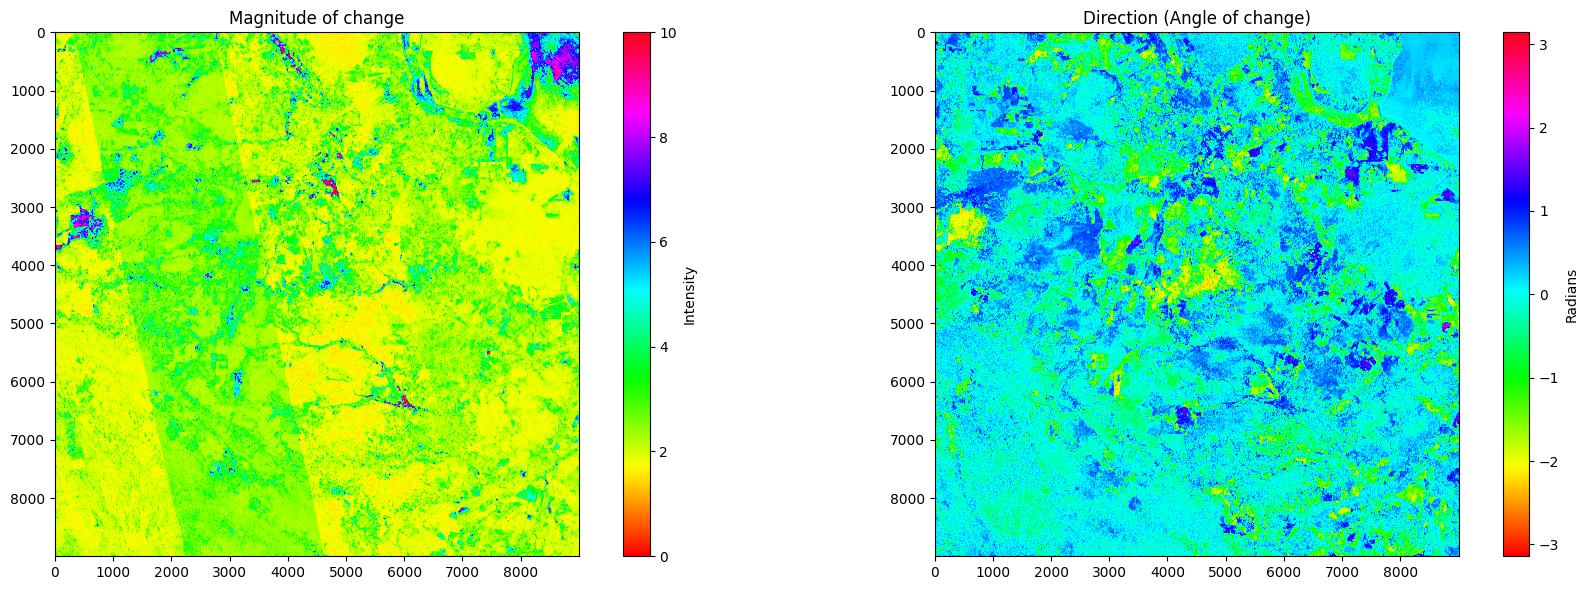

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

norm_magnitude = mcolors.Normalize(vmin=0, vmax=10)

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

im1 = axs[0].imshow(magnitude, cmap='hsv', norm=norm_magnitude)
axs[0].set_title("Magnitude of change")
cbar1 = fig.colorbar(im1, ax=axs[0])
cbar1.set_label("Intensity")

im2 = axs[1].imshow(angle, cmap='hsv')
axs[1].set_title("Direction (Angle of change)")
cbar2 = fig.colorbar(im2, ax=axs[1])
cbar2.set_label("Radians")

plt.tight_layout()
plt.show()

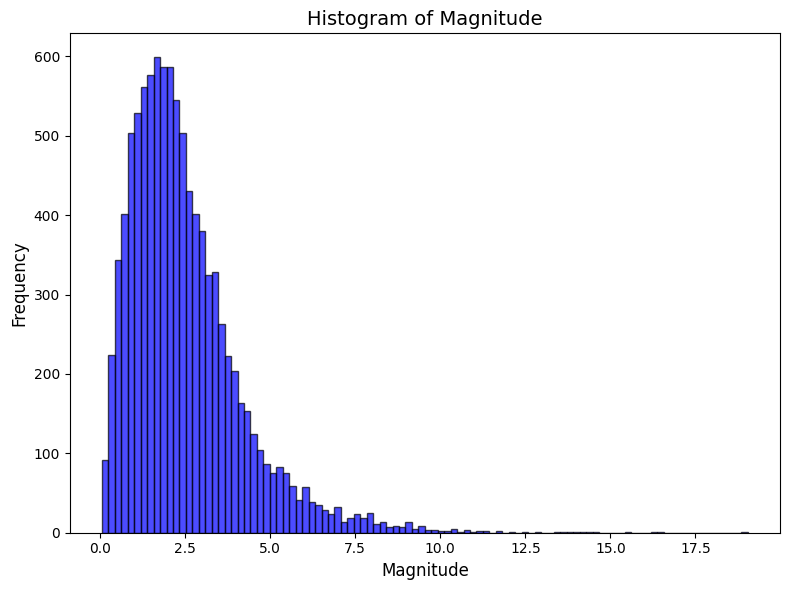

In [8]:
# Histograms

import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Generate and plot the histogram
data = np.random.choice(magnitude.ravel(), size=10000, replace=False)
ax.hist(data, bins=100, color='blue', edgecolor='black', alpha=0.7)

# Set plot title and labels
ax.set_title('Histogram of Magnitude', fontsize=14)
ax.set_xlabel('Magnitude', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()